# Remoing Bad Local Minima for a Test Optimization Function

In [56]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [57]:
#Optimization test function
def rastrigin(*X):
    return 10*len(X) + sum([(x**2 - 10 * np.cos(2 * np.pi * x)) for x in X])

def plot3DLoss( loss ):
    x = np.linspace(-4, 4, 200)    
    y = np.linspace(-4, 4, 200)    
    x, y = np.meshgrid(x,y)
    z = loss(x,y)

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('3D Loss Landscape', fontsize = 20 )

    ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)   
    plt.show()

def plot2DLoss( loss ):
    x = np.linspace(-4, 4, 200)    
    y = np.linspace(-4, 4, 200)    
    x, y = np.meshgrid(x,y)
    z = loss(x,y)
    
    plt.figure(figsize=(10,10))
    plt.contourf(x,y,z) 
    plt.title('2D Loss Landscape', fontsize = 20  )
    plt.colorbar()
    plt.show()

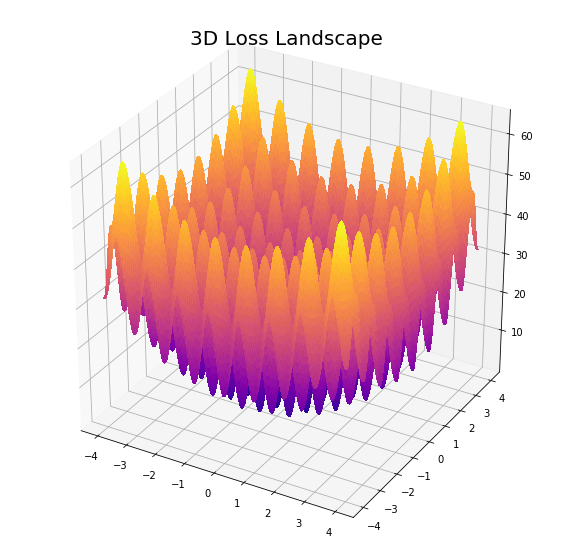

In [58]:
plot3DLoss( rastrigin )

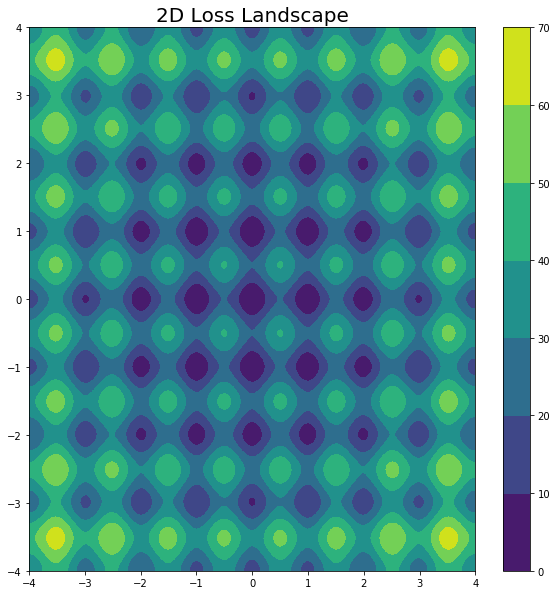

In [59]:
plot2DLoss( rastrigin )

## Eliminating All Bad Local Minima

Based on the recent [paper](https://arxiv.org/pdf/1901.03909.pdf), we will assume that our loss function $\mathcal{L}$ with parameters $\theta$, have a global minimum $\min_{\theta} \mathcal{L} (\theta) = 0 $.

We consider the modified loss function 
$$\tilde{\mathcal{L}}(\theta, \alpha, \beta ) = L(\theta) \left( 1 + ( a\exp(b) - 1 )^2 \right) + \lambda a^2  $$

where $a,b \in \mathbb{R}$ are auxiliary parameters and $\lambda \in \mathbb{R}^+$ is a regularization hyperparameter. 

** Our goal is to verify paper claim: any local minimum of $\tilde{\mathcal{L}}(\theta, \alpha, \beta )$ is a global minimum of $\mathcal{L}(\theta)$, and  $\tilde{\mathcal{L}}(\theta, \alpha, \beta )$ has no bad local minima.**

Let us assume that our loss function is given by **rastrigin** , then

$$\tilde{\mathcal{L}}(x, y , \alpha, \beta ) = \textbf{rastrigin}(x,y) \left( 1 + ( a\exp(b) - 1 )^2 \right) + \lambda a^2  $$



In [60]:
def modified_loss( X ):
    mod_loss = rastrigin(X[0],X[1])*(1. + (X[2]*np.exp(X[3]) - 1. )**2) + 2.*X[2]**2  # lambda = 2
    return mod_loss 

In [61]:
def plot1DLoss( X_s , X_t , loss ):
    alpha = np.linspace(0,1,1000)
    losses = np.asarray( [ loss( X_s + alpha_i * np.subtract(X_t,X_s)  ) for alpha_i in alpha ] )
    plt.figure(figsize = (20,10))
    plt.title('1D Loss Landscape', fontsize = 20  )
    plt.plot(alpha, losses)
    plt.show()

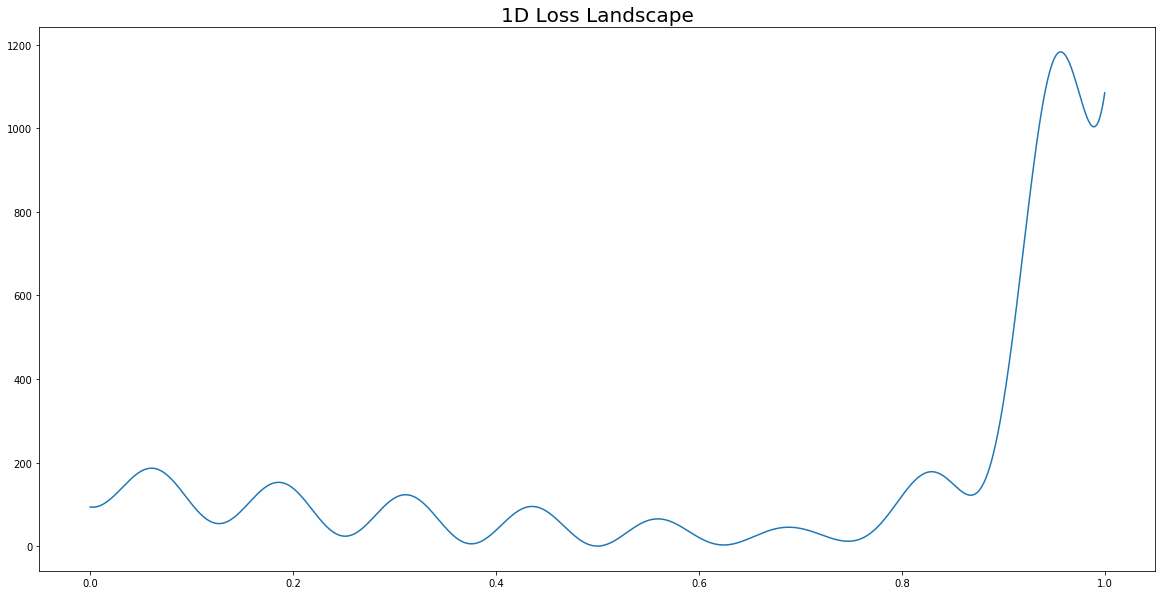

In [62]:
plot1DLoss( [-4,-4,-1.5,-1.5], [4,4,1.5,1.5], modified_loss)

In [112]:
def plot2DLoss( X_s, loss ):
    
    alpha = np.linspace(0,5,100)
    beta =  np.linspace(0,5,100)
    
    alpha , beta = np.meshgrid(alpha,beta)
    
    mu = np.random.normal(size = len(X_s))
    delta = np.random.normal(size = len(X_s))
    
    #Normalization
    mu /= np.linalg.norm(mu)
    delta /= np.linalg.norm(delta)
    
    losses = np.zeros_like(alpha)
    for i in range(alpha.shape[0]):
        for j in range(alpha.shape[1]):
            losses[i,j] = loss(X_s + alpha[i,j]*mu + beta[i,j]*delta)
    
    plt.figure(figsize = (10,10))
    plt.contourf(alpha,beta,losses) 
    plt.title('2D Loss Landscape', fontsize = 20  )
    plt.colorbar()
    plt.show()

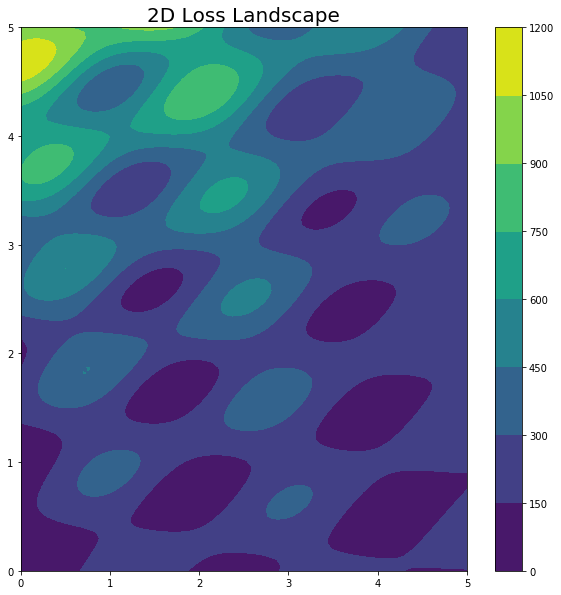

In [113]:
plot2DLoss([0,0,1,1], modified_loss )